In [121]:
import torch
import torchvision
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torch import nn
from torchvision import transforms
import sklearn as skl
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset
import torchmetrics
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler as MMS

In [122]:
df=pd.read_csv('../train_data_329x19.csv')
df.drop('Unnamed: 0',inplace=True,axis=1)

In [4]:
df.columns

Index(['patient_age', 'patient_gender', 'Ht', 'Wt', 'HB', 'UREA', 'CR', 'Na',
       'K', 'FBS', 'HBA1C', 'SGOT', 'SGPT', 'calories', 'cho', 'Fat', 'pro',
       'fluids', 'NA'],
      dtype='object')

In [107]:
len(df.columns)

19

array([[<AxesSubplot:title={'center':'patient_age'}>,
        <AxesSubplot:title={'center':'patient_gender'}>,
        <AxesSubplot:title={'center':'Ht'}>,
        <AxesSubplot:title={'center':'Wt'}>],
       [<AxesSubplot:title={'center':'HB'}>,
        <AxesSubplot:title={'center':'UREA'}>,
        <AxesSubplot:title={'center':'CR'}>,
        <AxesSubplot:title={'center':'Na'}>],
       [<AxesSubplot:title={'center':'K'}>,
        <AxesSubplot:title={'center':'FBS'}>,
        <AxesSubplot:title={'center':'HBA1C'}>,
        <AxesSubplot:title={'center':'SGOT'}>],
       [<AxesSubplot:title={'center':'SGPT'}>,
        <AxesSubplot:title={'center':'calories'}>,
        <AxesSubplot:title={'center':'cho'}>,
        <AxesSubplot:title={'center':'Fat'}>],
       [<AxesSubplot:title={'center':'pro'}>,
        <AxesSubplot:title={'center':'fluids'}>,
        <AxesSubplot:title={'center':'NA'}>, <AxesSubplot:>]],
      dtype=object)

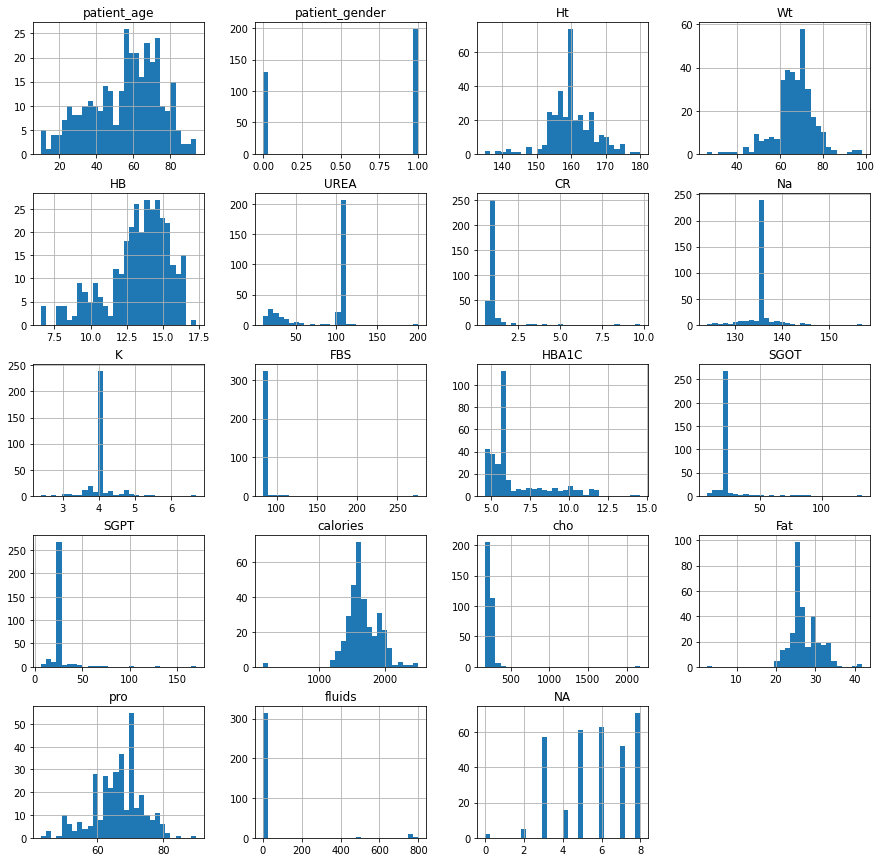

In [110]:
df.hist(bins=30,figsize=(15,15))

<AxesSubplot:>

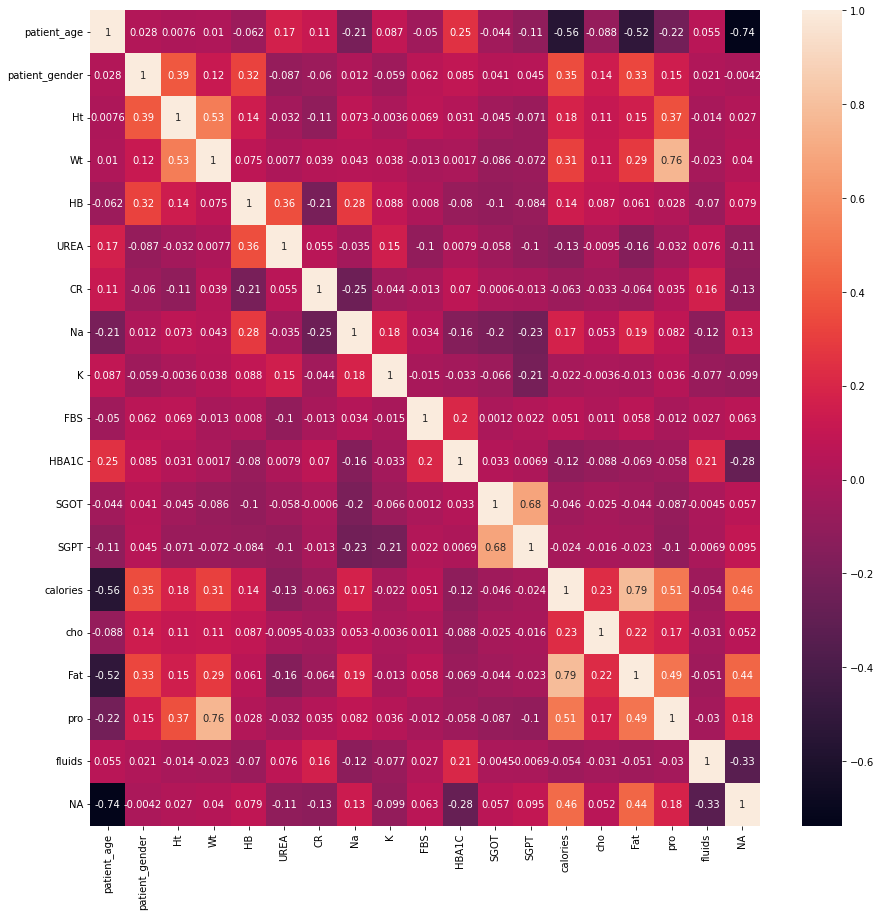

In [116]:
fig,ax=plt.subplots(figsize=(15,15))

sns.heatmap(df.corr(),ax=ax,annot=True)

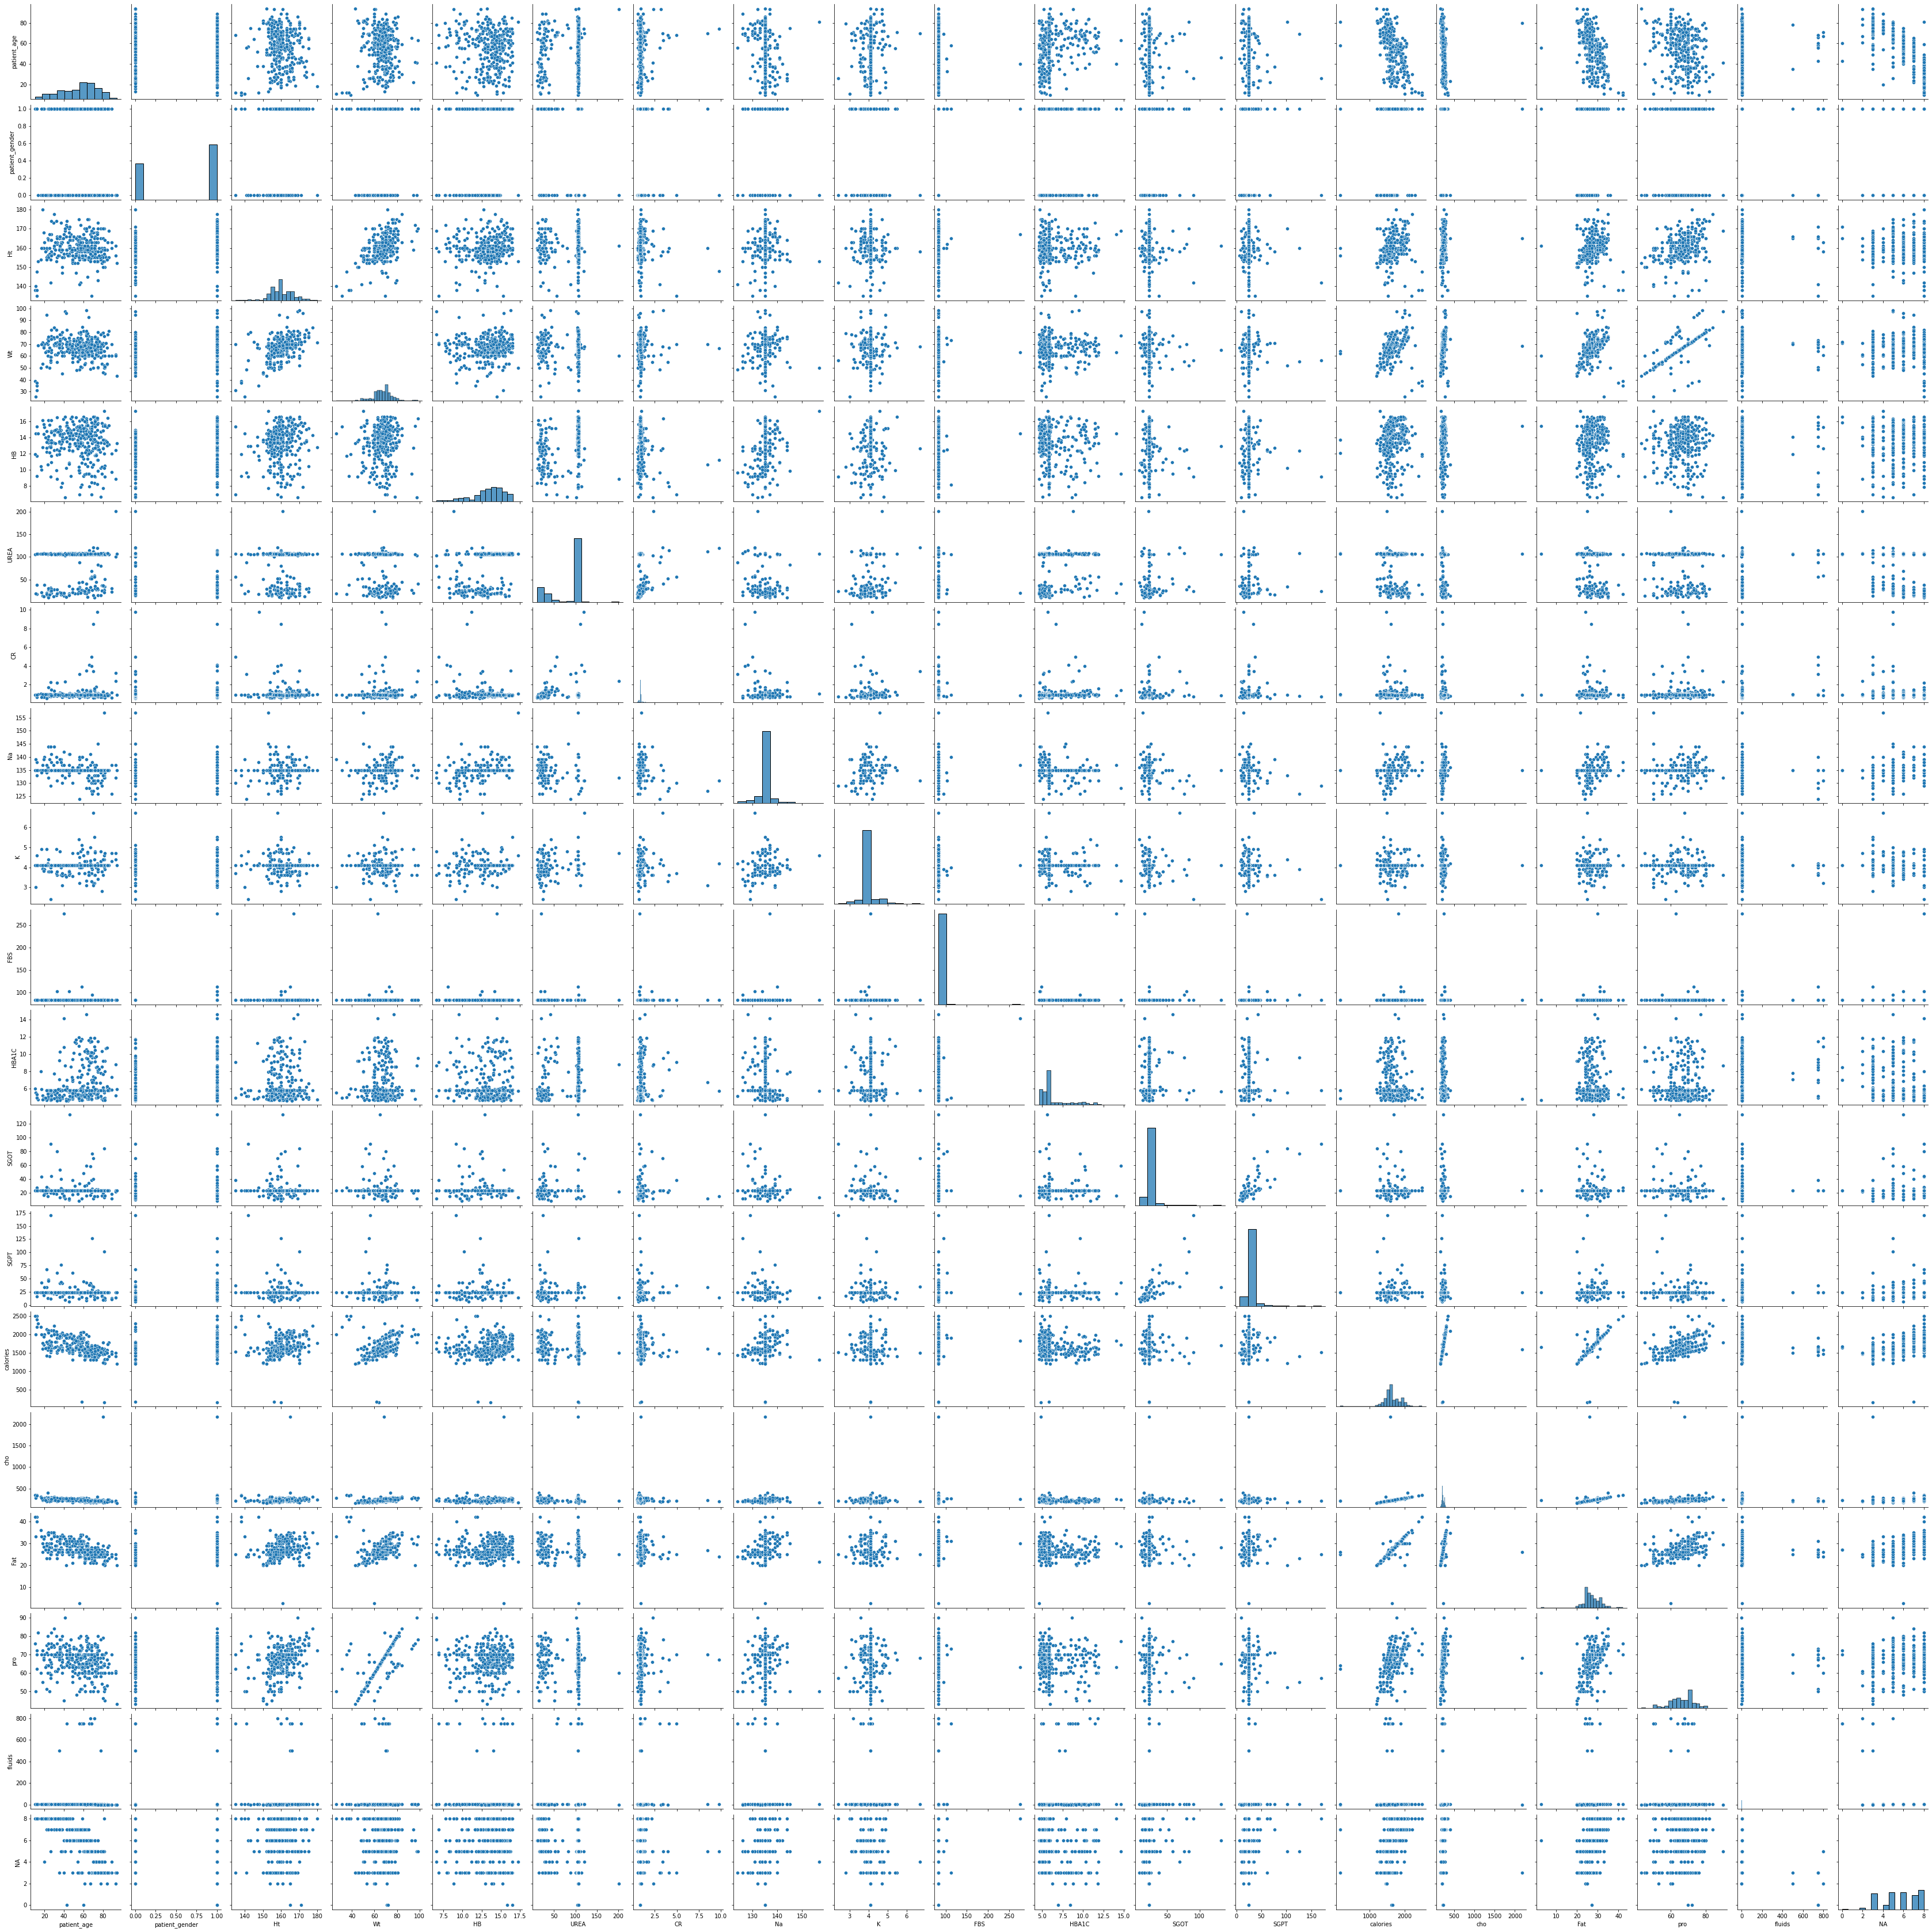

In [117]:
sns.pairplot(df)

In [5]:
df.head()

,patient_age,patient_gender,Ht,Wt,HB,UREA,CR,Na,K,FBS,HBA1C,SGOT,SGPT,calories,cho,Fat,pro,fluids,NA
0,64.0,0,155.0,60.0,12.73,106.59,0.91,135.0,4.1,83.0,7.75,22.8,24.8,1800.0,246.0,30.0,60.0,3.0,7.0
1,71.0,1,160.0,65.0,8.30,10.60,0.56,137.0,3.6,83.0,5.91,14.7,15.1,1600.0,220.0,26.6,52.0,2.8,6.0
2,23.0,0,165.0,74.0,10.60,14.40,0.75,136.0,4.2,83.0,5.80,14.3,13.5,2090.0,400.0,34.8,80.0,3.0,7.0
3,41.0,0,169.0,97.5,6.58,102.50,2.30,132.0,3.6,83.0,8.65,11.2,10.0,1770.0,243.0,29.5,90.0,1.0,5.0
4,54.0,0,158.0,75.0,12.76,107.17,0.97,135.0,4.1,83.0,5.14,22.8,24.8,1800.0,247.5,30.0,66.0,3.0,4.0


In [123]:
x=df.drop(['calories','cho','Fat','pro','fluids','NA'],axis=1)
x

,patient_age,patient_gender,Ht,Wt,HB,UREA,CR,Na,K,FBS,HBA1C,SGOT,SGPT
0,64.0,0,155.0,60.0,12.73,106.59,0.91,135.0,4.1,83.0,7.75,22.8,24.8
1,71.0,1,160.0,65.0,8.30,10.60,0.56,137.0,3.6,83.0,5.91,14.7,15.1
2,23.0,0,165.0,74.0,10.60,14.40,0.75,136.0,4.2,83.0,5.80,14.3,13.5
3,41.0,0,169.0,97.5,6.58,102.50,2.30,132.0,3.6,83.0,8.65,11.2,10.0
4,54.0,0,158.0,75.0,12.76,107.17,0.97,135.0,4.1,83.0,5.14,22.8,24.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,27.0,1,164.0,74.0,16.11,105.92,0.86,135.0,4.1,83.0,5.18,22.8,24.8
325,48.0,1,159.0,68.5,16.57,105.60,0.87,135.0,4.1,83.0,7.31,22.8,24.8
326,12.0,1,135.0,31.0,15.32,107.02,0.90,135.0,4.1,83.0,4.92,22.8,24.8
327,85.0,1,163.0,78.0,16.43,107.76,0.85,135.0,4.1,83.0,5.80,22.8,24.8


In [124]:
y=df.drop(['patient_age','patient_gender','Ht','Wt','HB','UREA','CR','Na','K','FBS','HBA1C','SGOT','SGPT'],axis=1)
y

,calories,cho,Fat,pro,fluids,NA
0,1800.0,246.0,30.0,60.0,3.0,7.0
1,1600.0,220.0,26.6,52.0,2.8,6.0
2,2090.0,400.0,34.8,80.0,3.0,7.0
3,1770.0,243.0,29.5,90.0,1.0,5.0
4,1800.0,247.5,30.0,66.0,3.0,4.0
...,...,...,...,...,...,...
324,1800.0,248.0,30.0,70.0,3.0,8.0
325,1890.0,260.0,31.0,68.0,3.0,7.0
326,2200.0,NaN,NaN,62.0,3.0,8.0
327,1730.0,238.0,28.0,63.0,2.0,3.0


In [125]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# to tensorset

In [126]:
x_train=torch.tensor(x_train.values,dtype=torch.float32)
y_train=torch.tensor(y_train.values,dtype=torch.float32)
x_test=torch.tensor(x_test.values,dtype=torch.float32)
y_test=torch.tensor(y_test.values,dtype=torch.float32)


In [127]:
train_data=TensorDataset(x_train,y_train)
test_data=TensorDataset(x_test,y_test)


In [128]:
x.shape,y.shape

((329, 13), (329, 6))

In [129]:
class Linear(nn.Module):
    def __init__(self,input_features,output_features):
        super().__init__()
        self.layer=nn.Sequential(nn.Linear(input_features,out_features=512),
            nn.ReLU(),
            nn.Linear(512,256),
            nn.ReLU(),
            nn.Linear(256,128),
            nn.ReLU(),
            nn.Linear(128,64),
            nn.ReLU(),
        nn.Linear(64,output_features))
    
    def forward(self,x):
        return self.layer(x)


In [133]:
LEARNING_RATE=0.0001
EPOCHS=100


In [134]:
model= Linear(13,6)
loss_fn=nn.L1Loss()
optimizer=torch.optim.Adam(model.parameters(),lr=LEARNING_RATE)
accuracy=torchmetrics.Accuracy()

In [135]:
model.eval()
with torch.inference_mode():
    x,y=test_data[0]
    print(x)
    print(model(x))

tensor([ 78.0000,   0.0000, 160.0000,  78.0000,   6.6000,  80.7000,   0.6800,
        134.0000,   4.8000,  83.0000,   5.0900,  22.8000,  24.8000])
tensor([ 2.0831, -0.6362,  1.0696,  1.0055,  0.6547, -0.5548])


# Train loop 
below

In [136]:
loss_graph=[]
for i in range(EPOCHS):
    model.train()
    total_loss=0
    for x,y in train_data:
        y_pred=model(x)
        #print(y_pred)
        loss=loss_fn(y_pred,y)
        print(loss)
        total_loss+=loss
      
       # acc=accuracy(y_pred,y)
        #total_acc+=acc

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    loss_graph.append(total_loss.detach().numpy())
#print(f'Train Loss: {total_loss/len(train_data)} | Train Acc: {total_acc/len(train_data)}')


tensor(321.7893, grad_fn=<L1LossBackward0>)
tensor(381.4053, grad_fn=<L1LossBackward0>)
tensor(280.1221, grad_fn=<L1LossBackward0>)
tensor(326.5222, grad_fn=<L1LossBackward0>)
tensor(378.8655, grad_fn=<L1LossBackward0>)
tensor(382.2949, grad_fn=<L1LossBackward0>)
tensor(393.4200, grad_fn=<L1LossBackward0>)
tensor(391.9486, grad_fn=<L1LossBackward0>)
tensor(321.0475, grad_fn=<L1LossBackward0>)
tensor(335.5663, grad_fn=<L1LossBackward0>)
tensor(331.0215, grad_fn=<L1LossBackward0>)
tensor(348.1289, grad_fn=<L1LossBackward0>)
tensor(233.5615, grad_fn=<L1LossBackward0>)
tensor(320.2591, grad_fn=<L1LossBackward0>)
tensor(315.5480, grad_fn=<L1LossBackward0>)
tensor(271.1119, grad_fn=<L1LossBackward0>)
tensor(255.0573, grad_fn=<L1LossBackward0>)
tensor(275.0977, grad_fn=<L1LossBackward0>)
tensor(293.4439, grad_fn=<L1LossBackward0>)
tensor(286.6020, grad_fn=<L1LossBackward0>)
tensor(347.5375, grad_fn=<L1LossBackward0>)
tensor(383.9157, grad_fn=<L1LossBackward0>)
tensor(315.9440, grad_fn=<L1Loss

In [137]:
model.eval()
with torch.inference_mode():
    x,y=test_data[torch.randint(0,len(test_data),size=[1])]
    print('input:',x)
    print('True Output: ',y)
    y_pred=model(x)
    print('prediction:',y_pred)
    print('Calories',loss_fn(y_pred.squeeze()[0],y.squeeze()[0]))
    print('Cho',loss_fn(y_pred.squeeze()[1],y.squeeze()[1]))
    print('fat',loss_fn(y_pred.squeeze()[2],y.squeeze()[2]))
    print('proteins',loss_fn(y_pred.squeeze()[3],y.squeeze()[3]))
    print('fluids',loss_fn(y_pred.squeeze()[4],y.squeeze()[4]))
    print('sodium',loss_fn(y_pred.squeeze()[5],y.squeeze()[5]))

    print((torchmetrics.R2Score()(y_pred.squeeze(),y.squeeze())))
    

input: tensor([[ 27.0000,   1.0000, 174.0000,  82.0000,  13.6000,  29.0000,   1.4800,
         135.0000,   4.1000,  83.0000,   5.3600,  22.8000,  24.8000]])
True Output:  tensor([[1960.0000,  269.0000,   32.0000,   82.0000,    3.1000,    8.0000]])
prediction: tensor([[2034.3453,  273.4770,   31.8817,   74.1346,    3.5253,    5.5267]])
Calories tensor(74.3453)
Cho tensor(4.4770)
fat tensor(0.1183)
proteins tensor(7.8654)
fluids tensor(0.4253)
sodium tensor(2.4733)
tensor(0.9981)


In [138]:
score_x=torch.concat((x_train,x_test))
score_y=torch.concat((y_train,y_test))

In [139]:
score_data=TensorDataset(score_x,score_y)

# Evaluate loop

In [140]:
mms=MMS()

In [141]:
l=[]
for x,y in score_data:
    model.eval()
    with torch.inference_mode():
        y_pred=model(x)
        l.append(y_pred.detach().numpy())


In [144]:
l=mms.fit_transform(l)

In [145]:
l

array([[0.50748321, 0.51222716, 0.5271824 , 0.48062145, 0.70156299,
        0.72785874],
       [0.53578218, 0.53878626, 0.55018354, 0.60569232, 0.67402088,
        0.58233368],
       [0.446059  , 0.44838181, 0.463385  , 0.56428699, 0.62098932,
        0.44262406],
       ...,
       [0.42487453, 0.42530076, 0.43642188, 0.57249776, 0.47187368,
        0.30123346],
       [0.30000937, 0.30130752, 0.3219858 , 0.4010767 , 0.4169575 ,
        0.27248227],
       [0.42872741, 0.43110992, 0.44699268, 0.55070937, 0.60247138,
        0.42686212]])

In [146]:
score=[]

In [147]:
for i in l:
    score.append(i.sum())

In [148]:
len(score)

329

In [149]:
score

[3.4569359340547545,
 3.486798863016868,
 2.985726178992026,
 3.081401025705154,
 3.746184519984692,
 4.317493151557858,
 4.357410883618306,
 3.688565814935341,
 3.290863523632581,
 3.79592291296015,
 3.329478349707796,
 4.809765990891922,
 0.15863136192334604,
 3.761379060823902,
 3.9785172565557203,
 1.9717423238520273,
 1.4919746993824958,
 2.1187927781208176,
 3.3923367403636884,
 1.9187228665457638,
 2.4215394746411425,
 4.338184735972498,
 2.9534306450784933,
 3.7195571554861937,
 2.482255153217938,
 2.62328865526999,
 2.85481857784864,
 3.0222044444842706,
 2.9519537578595223,
 2.8387519649029516,
 3.8514952577646726,
 3.601339677321913,
 2.8361103931963654,
 3.5808359274792614,
 2.419101615051964,
 2.3034700206244207,
 4.139180495207244,
 4.41424360745424,
 2.897912616710781,
 4.237412408489731,
 3.036205035099718,
 5.198319463824342,
 4.185554048415984,
 3.850683770255843,
 2.5363231681559704,
 0.842660732522882,
 3.1522929704633187,
 3.5562227920183136,
 4.004677806142422,
 3

In [150]:
score_df=pd.DataFrame(score,columns=['score']).round(2)

In [151]:
score_df

,score
0,3.46
1,3.49
2,2.99
3,3.08
4,3.75
...,...
324,5.21
325,3.17
326,2.63
327,2.01


In [158]:
for i in score_df['score'].unique():
    

-107

In [153]:
sub_df=pd.concat([df,score_df],axis=1)

In [154]:
sub_df.head()

,patient_age,patient_gender,Ht,Wt,HB,UREA,CR,Na,K,FBS,HBA1C,SGOT,SGPT,calories,cho,Fat,pro,fluids,NA,score
0,64.0,0,155.0,60.0,12.73,106.59,0.91,135.0,4.1,83.0,7.75,22.8,24.8,1800.0,246.0,30.0,60.0,3.0,7.0,3.46
1,71.0,1,160.0,65.0,8.30,10.60,0.56,137.0,3.6,83.0,5.91,14.7,15.1,1600.0,220.0,26.6,52.0,2.8,6.0,3.49
2,23.0,0,165.0,74.0,10.60,14.40,0.75,136.0,4.2,83.0,5.80,14.3,13.5,2090.0,400.0,34.8,80.0,3.0,7.0,2.99
3,41.0,0,169.0,97.5,6.58,102.50,2.30,132.0,3.6,83.0,8.65,11.2,10.0,1770.0,243.0,29.5,90.0,1.0,5.0,3.08
4,54.0,0,158.0,75.0,12.76,107.17,0.97,135.0,4.1,83.0,5.14,22.8,24.8,1800.0,247.5,30.0,66.0,3.0,4.0,3.75


In [155]:
sub_df.shape

(329, 20)

In [156]:
sub_df.to_csv('diet_with_score_decimal.csv')

In [166]:
l=[3,5,8]
from statistics import mean,median
import statistics

In [161]:
mean(l)

5

In [167]:
statistics.stdev(l)

2.516611478423583

In [171]:
np.std(l)

2.0548046676563256